# FINAL PROJECT 4 (Clustering)

Oleh Group 6

- Kelas		    : KS-015
- Program	    : Python for Data Science

Anggota:
1.  - Nama          : Annisa Nur Hidayah
    - Kode peserta  : PYTN-KS15-002
2.  - Nama          : Lisa Wahyu Ningsih
    - Kode peserta  : PYTN-KS15-007
3.  - Nama          : Nadilla Nur 'Aini Yulian Putri
    - Kode peserta  : PYTN-KS15-012


## Introduction

Data yang digunakan bersumber dari website kaggle. dataset berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit. Tujuan utama dari penelitian ini untuk menunjukkan segmentasi pelanggan yang paling sesuai dengan dataset ini dengan mengimplementasikan analisa clustering. Algoritma dan metode yang digunakan pada project ini adalah algoritma K-Means Clustering dan K-Medoids, hal ini karena algoritma ini lebih efisien dalam menangani dataset yang besar, algoritma sederhana dan mudah untuk dimengerti dan diterapkan.

Dataset ini berisi transaksi pengguna kartu kredit sebanyak 8950 transaksi selama 6 bulan dengan 18 atribut. Dataset ini dapat diunduh melalui laman berikut https://www.kaggle.com/datasets/arjunbhasin2013/ccdata.

## Import Pustaka

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import sklearn
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

from IPython.display import Math, Latex
from IPython.core.display import Image
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})
import statsmodels.api as sm

import random
import warnings
warnings.filterwarnings("ignore")
from functools import reduce

plt.style.use('ggplot')
%matplotlib inline

## Data Loading

In [ ]:
# Mengimpor dataset
df = pd.read_csv('dataset\CC GENERAL.csv')

In [ ]:
# Meng-copy data
df = CCG.copy()

In [ ]:
# Menampilkan 5 data teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Menampilkan 5 data terakhir
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
# Menampilkan dimensi data
df.shape

(8950, 18)

Dataset ini terdiri dari 8950 baris dan 18 kolom.

In [ ]:
# Menampilkan kolom dataset
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Terdapat 18 kolom dalam dataset ini.

In [ ]:
# Menampilkan informasi setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Attribute Information:
1. CUSTID- Identification of Credit Card holder (Categorical).
2. BALANCE- Balance amount left in their account tomake purchases.
3. BALANCEFREQUENCY- How frequently the Balance is updated,score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
4. PURCHASES- Amount of purchases made from account.
5. ONEOFFPURCHASES- Maximum purchase amount done inone-go.
6. INSTALLMENTSPURCHASES- Amount of purchase done ininstallment.
7. CASHADVANCE- Cash in advance given by the user.
8. PURCHASESFREQUENCY- How frequently the Purchasesare being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
9. ONEOFFPURCHASESFREQUENCY- How frequently Purchasesare happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
10. PURCHASESINSTALLMENTSFREQUENCY- How frequently purchasesin installments are being done (1 = frequently done, 0 = not frequently done).
11. CASHADVANCEFREQUENCY- How frequently the cash inadvance being paid.
12. CASHADVANCETRX- Number of Transactions made with"Cash in Advance".
13. PURCHASESTRX- Number of purchase transactions made.
14. CREDITLIMIT- Limit of Credit Card for user.
15. PAYMENTS- Amount of Payment done by user.
16. MINIMUM_PAYMENTS- Minimum amount of payments madeby user.
17. PRCFULLPAYMENT- Percent of full payment paid by user.
18. TENURE- Tenure of credit card service for user.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Observasi:

1. Kami akan mengecualikan CUST_ID dari analisis segmentasi pelanggan karena setiap id unik untuk setiap pelanggan.
2. CREDIT_LIMIT dan MINIMUM_PAYMENTS berisi nilai null.
3. Dataset hanya berisi nilai numerik.
4. Analisis ini mengungkapkan perbedaan nyata antara nilai rata-rata dan median untuk sebagian besar fitur. Ini menunjukkan potensi kecondongan dalam dataset, yang membutuhkan penyelidikan lebih lanjut dan kemungkinan tindakan korektif.

In [ ]:
# Menampilkan kolom
df_=df.head(10)
df_.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [ ]:
# Menampilkan jumlah nilai unique tiap atribut
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
# Menampilkan nilai unique tiap atribut
for val in df.columns:
    print(val, ': ')
    print(df[val].value_counts())
    print(" ")

CUST_ID : 
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64
 
BALANCE : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64
 
BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000    

In [ ]:
df["TENURE"].dtype

dtype('int64')

## Data Cleaning

### Cek Missing Value

In [ ]:
# Memeriksa missing value
print(df.isnull().any())

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool


In [ ]:
# Menampilkan jumlah missing value
jumlah_missing=pd.isnull(df).sum()
jumlah_missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Menampilkan rasio missing value
rasio = jumlah_missing.div(len(df))
rasio

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Berdasarkan hasil output di atas menunjukkan bahwa ada missing value pada kolom Credit Limit dan Minimum Payments. Karena ada beberapa missing value yang nilainya dibawah 5% semua, maka kita perlu mengatasinya dengan cara mengisi value dengan nilai mean.

In [ ]:
# Mengisi missing value dengan nilai mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing value sudah hilang.

In [ ]:
# Mengecek duplikasi data
df.duplicated().sum()

0

Tidak ada data yang berduplikasi.

In [ ]:
# Menampilkan informasi tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Setelah menangani missing value, maka dapat terlihat bahwa missing value sudah tidak ada dan bisa melanjutkan ke proses selanjutnya.

## Exploration Data Analysis (EDA)

In [ ]:
# Melihat statistik deskriptif pada dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dari output di atas menunjukkan beberapa informasi, di antaranya:

1. Balance: Rata-rata jumlah saldo customer yang tersisa adalah 1564 dengan nilai minimum 0 dan nilai maksimal adalah 19043.
2. Purchases: Rata-rata jumlah saldo pembelian customer adalah 1003 dengan nilai minimum 0 dan nilai maksimum 49039.
3. Cash Advanced: Rata-rata jumlah uang muka yang diberikan customer adalah 978 dengan nilai minimum 0 dan nilai maksimum 47137.
4. Credit limit minimal, yaitu 50 dan maksimalnya adalah 30000.

In [ ]:
# Melihat nilai minimum pada setiap data
minimum = df.min()
minimum

CUST_ID                               C10001
BALANCE                                  0.0
BALANCE_FREQUENCY                        0.0
PURCHASES                                0.0
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                             0.0
PURCHASES_FREQUENCY                      0.0
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY                   0.0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                            50.0
PAYMENTS                                 0.0
MINIMUM_PAYMENTS                    0.019163
PRC_FULL_PAYMENT                         0.0
TENURE                                     6
dtype: object

Nilai minimum dari kolom CREDIT LIMIT sebesar 50 dolar, nilai minimum dari kolom MINIMUM PAYMENTS sebesar 19043 dolar, dan nilai minimum dari kolom TENURE adalah 6.

In [ ]:
# Melihat nilai maximum pada setiap data
maximum = df.max()
maximum

CUST_ID                                  C19190
BALANCE                             19043.13856
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  22500.0
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY            1.0
CASH_ADVANCE_FREQUENCY                      1.5
CASH_ADVANCE_TRX                            123
PURCHASES_TRX                               358
CREDIT_LIMIT                            30000.0
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                            1.0
TENURE                                       12
dtype: object

### Melihat Pengguna Kartu Kredit berdasarkan Jangka Waktu yang Diambil

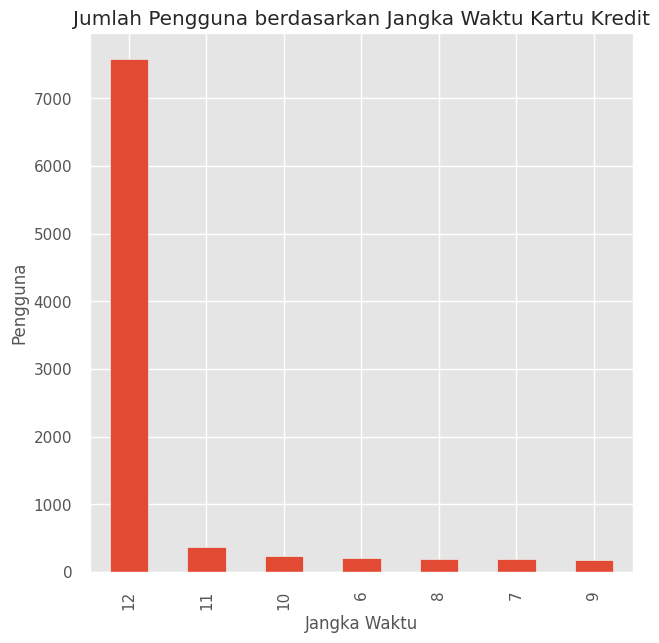

In [ ]:
df['TENURE'].value_counts().plot.bar()
plt.title('Jumlah Pengguna berdasarkan Jangka Waktu Kartu Kredit')
plt.ylabel('Pengguna')
plt.xlabel('Jangka Waktu')
plt.show()

Dari output tersebut, dapat dilihat bahwa lebih banyak pengguna yang mengambil jangka waktu kredit dalam waktu 12 bulan dengan jumlah pengguna di atas 7000 orang.

### Melihat Batas Kredit berdasarkan Jangka Waktu Kredit

In [ ]:
dfc = df.pivot_table(
    index='TENURE',
    values='CREDIT_LIMIT',
    aggfunc='mean'
)
dfc

,CREDIT_LIMIT
TENURE,
6,3009.874752
7,2567.631579
8,2973.724490
9,2977.904762
10,3871.610169
11,4141.232877
12,4693.331329


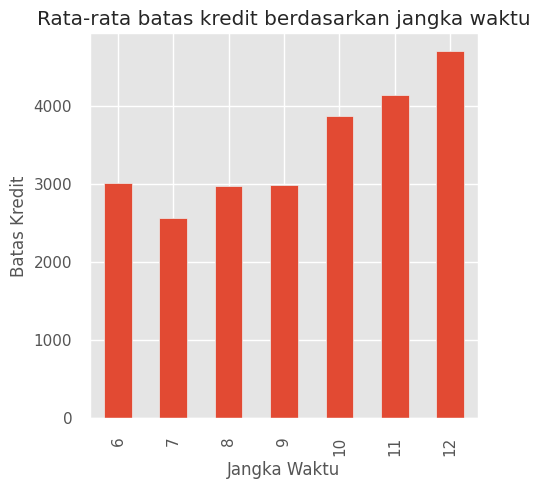

In [ ]:
# Visualisasi batas kredit berdasarkan jangka waktu

dfc.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Rata-rata batas kredit berdasarkan jangka waktu')
plt.ylabel('Batas Kredit')
plt.xlabel('Jangka Waktu')
plt.show()

Dari output di atas terlihat bahwa pengguna mengambil layanan kartu kredit dengan jangka waktu lebih lama akan mendapatkan batas kredit yang lebih besar.

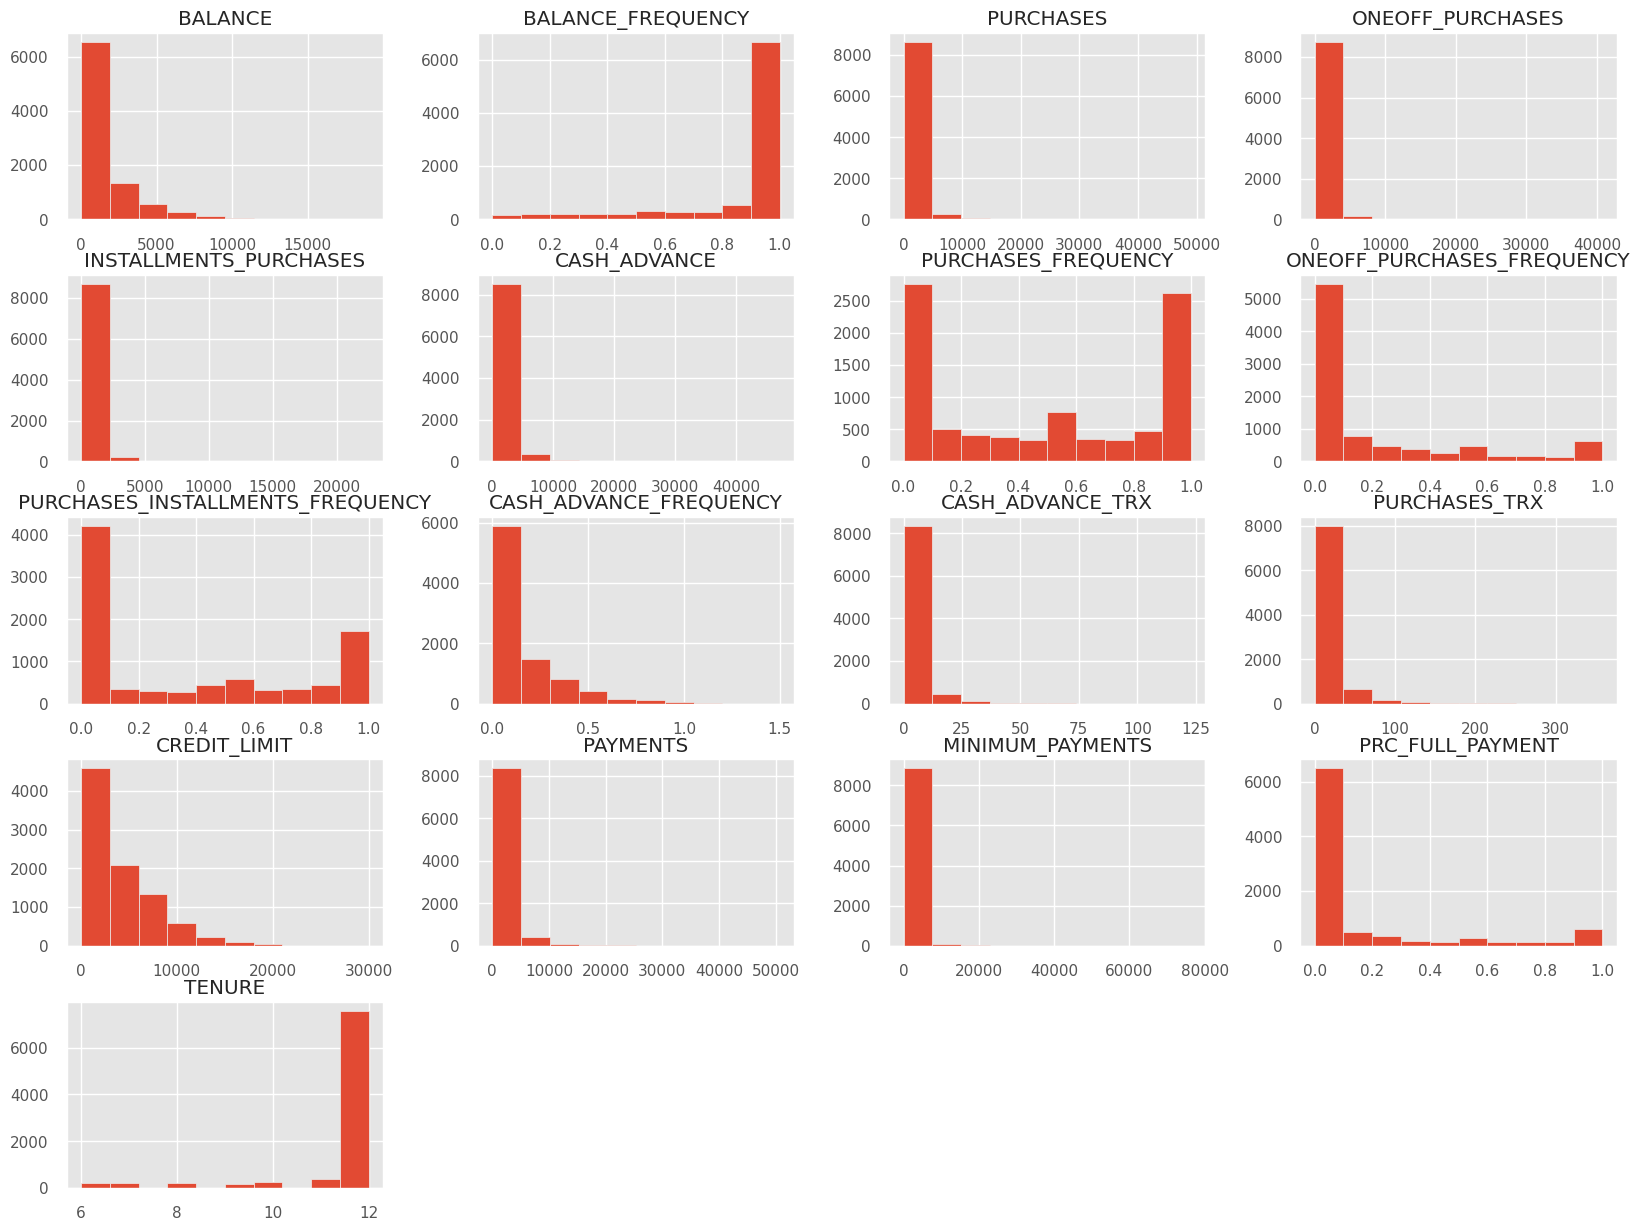

In [ ]:
# Membuat histogram pada setiap atribut
df.hist(figsize=(20,15));

Dari output di atas, dapat diketahui bahwa hampir semua atribut memiliki nilai minimum 0.

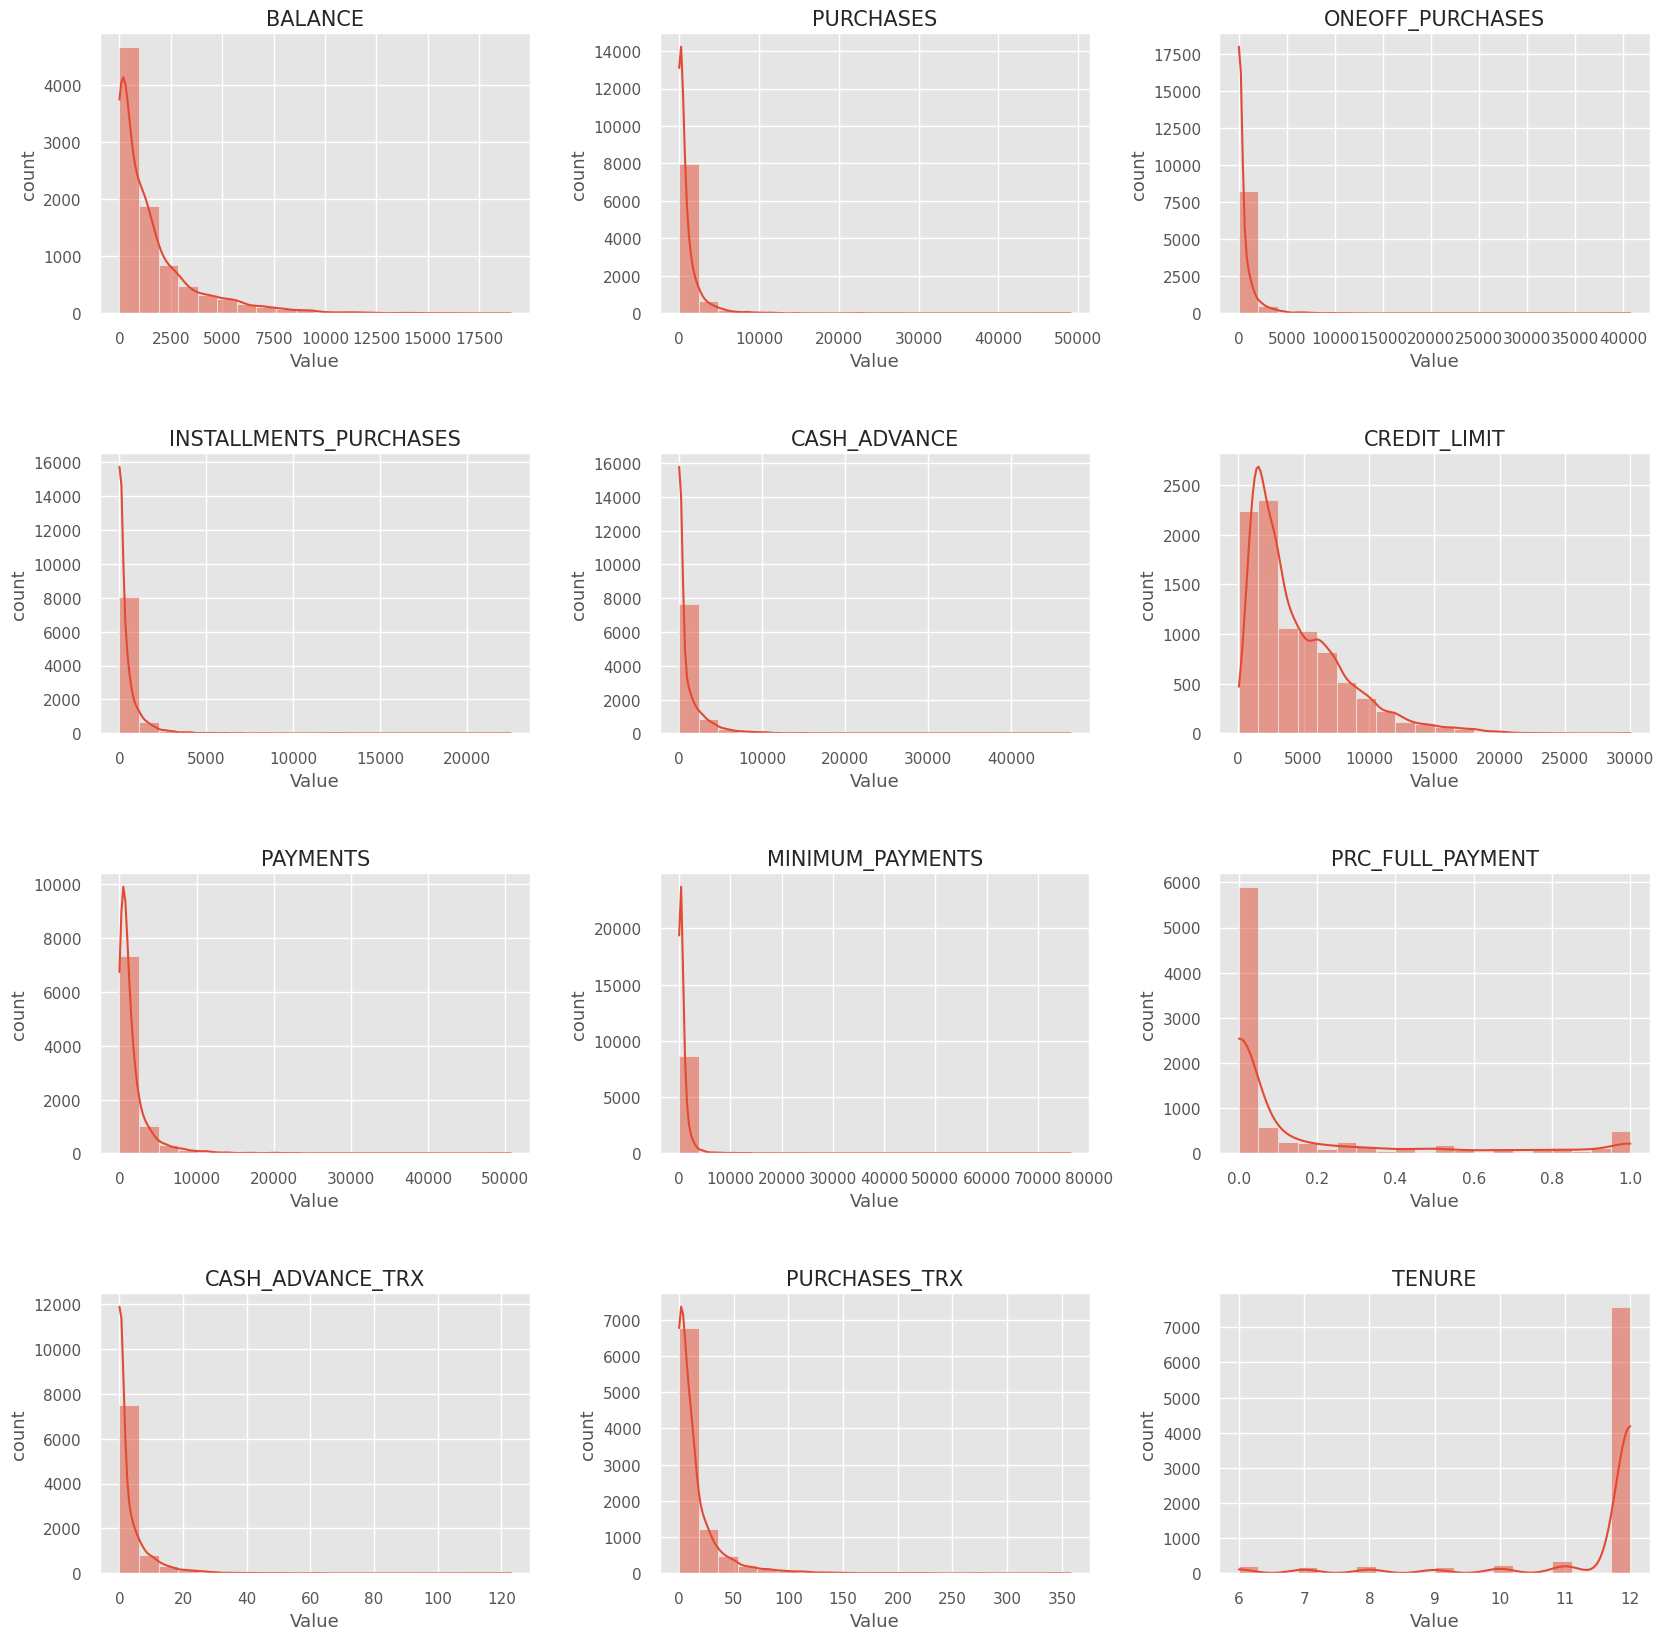

In [ ]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
intr_cols = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'balance_frequency', 'purchases_frequency',
             'oneoff_purchases_frequency', 'purchases_installments_frequency']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

Semua atribut pada dataset memiliki ditribusi tidak normal karena mengalami skewness.

### Korelasi Atribut

In [ ]:
# Mendapatkan nilai korelasi atribut
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


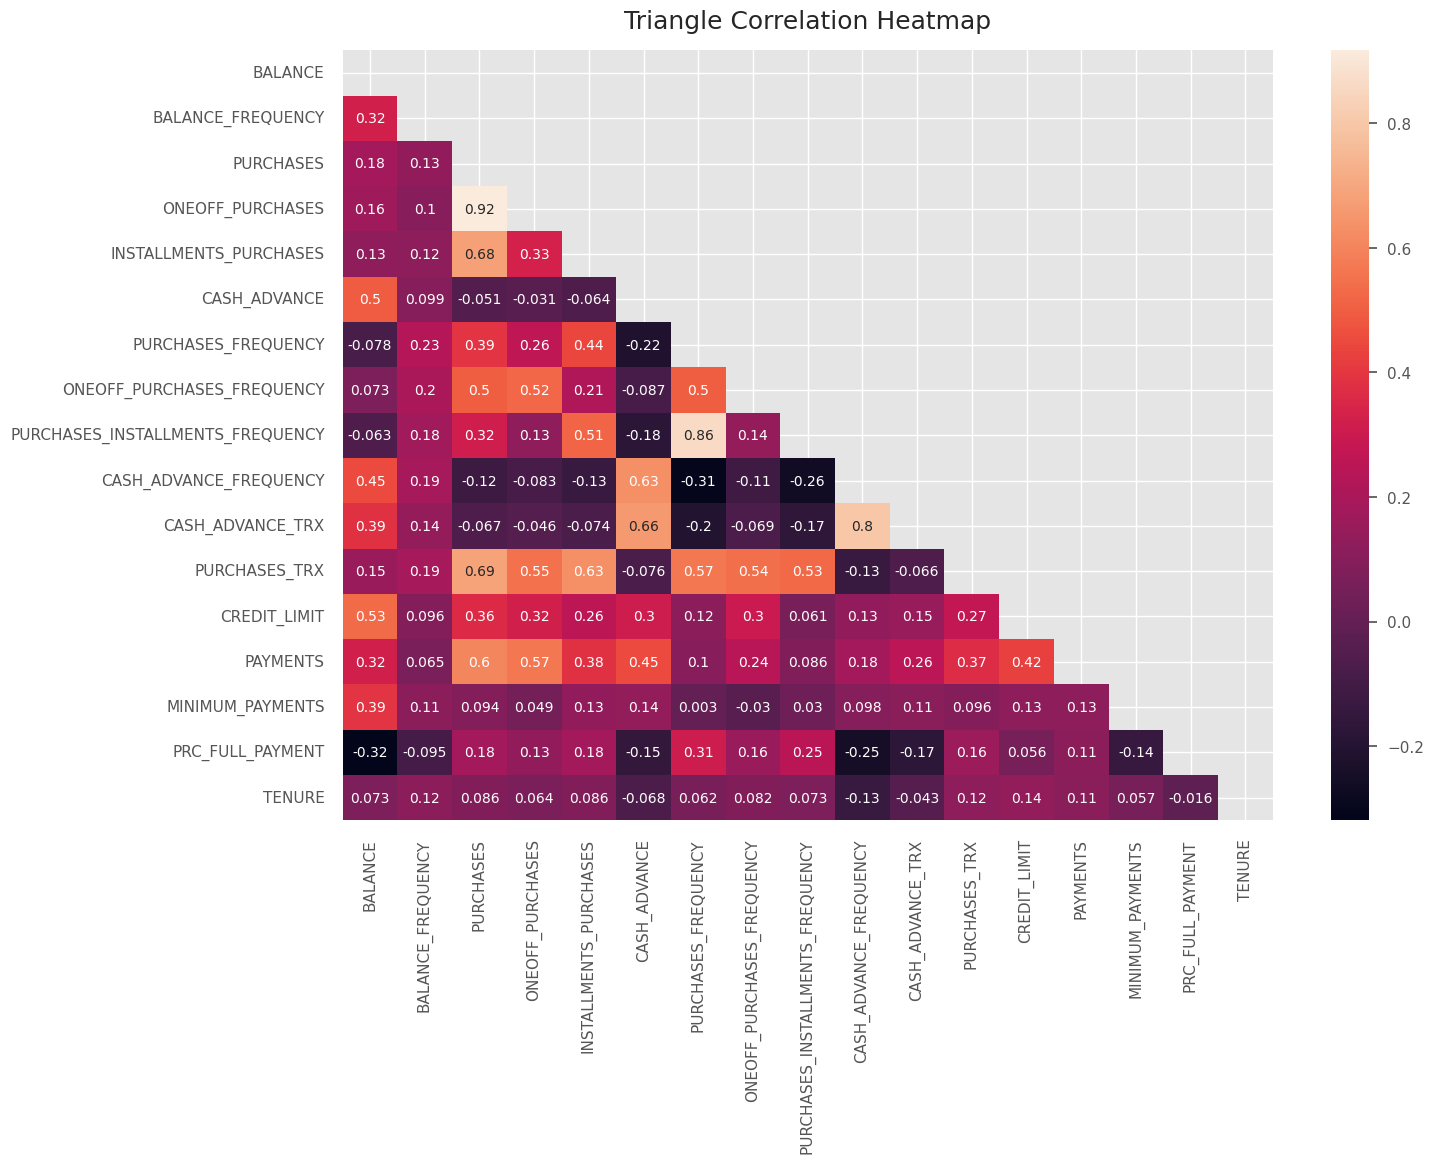

In [ ]:
# Visualisasi nilai korelasi atribut dengan heatmap
plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

Dari matrix korelasi yang dihasilkan, terlihat atribut yang memiliki korelasi tinggi yaitu:

- PURCHASES dan ONEOFF_PURCHASES sebesar 0.92
- PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY sebesar 0.86
- CASH_ADVANCED_FREQUENCY dan CASH_ADVANCED_TRX sebesar 0.8

## Data Prepocessing

### Slicing Data

Menghapus atribut CUST_ID karena bersifat unik.

In [ ]:
# Menghapus kolom CUST_ID
df.drop(['CUST_ID','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','ONEOFF_PURCHASES'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [ ]:
# Statistics of scaled data
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [ ]:
# Normalizing the Data
normalized_df = normalize(scaled_df)

In [ ]:
normalized_df = pd.DataFrame(normalized_df,columns = df.columns)
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339375,-0.115646,-0.196998,-0.161845,-0.216417,-0.373916,-0.314650,-0.313114,-0.237071,-0.445289,-0.245252,-1.441749e-01,-0.243663,0.167223
1,0.228862,0.039064,-0.136554,-0.132198,0.757754,-0.355308,-0.197366,0.166918,-0.172104,0.200268,0.238075,2.597292e-02,0.068117,0.104892
2,0.132554,0.153587,-0.031919,-0.134760,-0.138380,0.376449,0.792552,-0.200209,-0.032319,0.244888,-0.113780,-3.013834e-02,-0.155801,0.106924
3,0.023303,-0.482664,0.110139,-0.215750,-0.174970,-0.481323,-0.189524,-0.122885,-0.261783,0.392064,-0.284148,2.315333e-17,-0.249436,0.171185
4,-0.170788,0.246624,-0.219956,-0.216392,-0.222204,-0.482755,-0.190088,-0.321487,-0.262562,-0.431029,-0.173450,-1.265249e-01,-0.250179,0.171695


## Pendefinisian Model

a. K-Means Clustering

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean

KMeans(n_clusters=2)

b. K-Medoids

In [ ]:
kmedoids = KMedoids(n_clusters=2)
kmedoids

KMedoids(n_clusters=2)

## Pelatihan Model

In [ ]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(normalized_df)
    inertia.append(model.inertia_)

inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,8734.586907
2,6951.038571
3,6011.312133
4,5240.574589
5,4649.914620
6,4231.004827
7,3893.849209
8,3668.548003
9,3469.758724


Text(0, 0.5, 'Intertia')

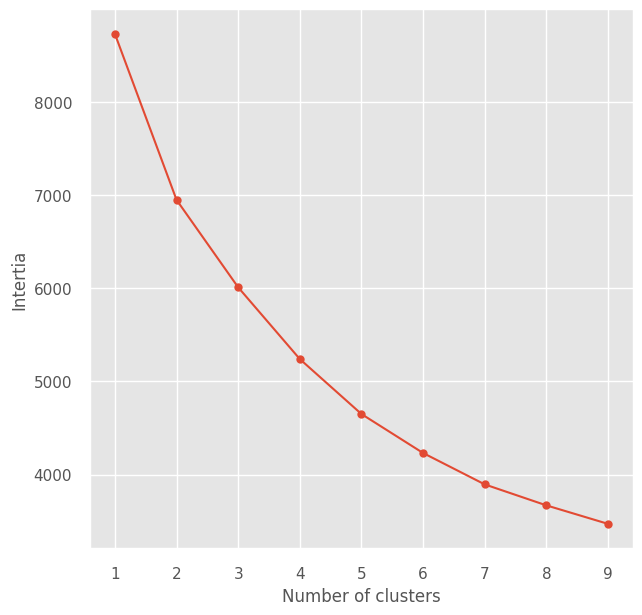

In [ ]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(normalized_df)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure()
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

Berdasarkan plot di atas, dapat dilihat bahwa cluster berjumlah 4 adalah yang paling optimal.

### a. K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++')
model1 = kmeans.fit(normalized_df)
label = kmeans.predict(normalized_df)

### b. K-Medoids

In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=0)
model2 = kmedoids.fit(normalized_df)
label2 = kmedoids.predict(normalized_df)

## Evaluasi Model

In [ ]:
ss_k1 = silhouette_score(normalized_df, label)
ss_k2 = silhouette_score(normalized_df, label2)

In [ ]:
model_selection = pd.DataFrame({'Silhouette Score': [ss_k1,ss_k2]},
                               index = ['K-means','K-Medoids'])
model_selection

,Silhouette Score
K-means,0.216389
K-Medoids,0.214975


Dari output silhouette_score terlihat bahwa algoritma k-means memiliki nilai yang lebih tinggi dari k-medoids sehingga kami akan menggunakan algoritma k-means.

### Melihat Nilai Rata-rata pada Kolom berdasarkan Cluster

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [normalized_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.095706,0.147945,0.083836,0.104634,-0.135410,0.342955,0.156504,-0.170993,0.144201,-0.017167,-0.025470,-0.040511,0.078678,0.061210
1,-0.228985,-0.566524,-0.098522,-0.089140,-0.109176,-0.136207,-0.143435,-0.162721,-0.129152,-0.088112,-0.094680,-0.090402,0.061913,-0.025167
2,0.279605,0.112834,-0.077561,-0.083890,0.274374,-0.156303,-0.083565,0.353881,-0.099885,0.135648,0.069133,0.066419,-0.127907,-0.029101
3,-0.092761,0.226601,-0.183717,-0.192429,-0.129267,-0.388651,-0.220477,-0.059946,-0.237084,-0.266604,-0.176006,-0.062782,-0.237769,0.120409


In [ ]:
# Invers data yang telah distandarisasi untuk lebih memahami karaktersitik klaster
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed, columns = [normalized_df.columns])
cluster_centers_inversed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1365.270092,0.912318,1182.321330,505.686920,694.910954,0.627995,0.249146,0.100927,18.294123,4431.989000,1659.411622,769.796309,0.176727,11.599233
1,1087.862037,0.743066,792.711426,330.459378,749.924781,0.435684,0.159668,0.102582,11.499608,4173.861884,1459.053913,653.529478,0.171823,11.483639
2,2146.448514,0.904000,837.494265,335.207357,1554.246173,0.427619,0.177529,0.205959,12.227072,4987.993614,1933.278543,1018.992610,0.116304,11.478373
3,1371.399873,0.930950,610.690756,237.056331,707.791324,0.334366,0.136685,0.123148,8.816812,3524.435754,1223.624612,717.896343,0.084171,11.678456


### Membuat Kolom Cluster pada Dataframe

In [ ]:
# Membuat kolom keterangan klaster pada dataframe
df_clusters = pd.concat([df, pd.DataFrame({'cluster':label})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,3


In [ ]:
df_clusters.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster'],
      dtype='object')

### Clusters Visualization

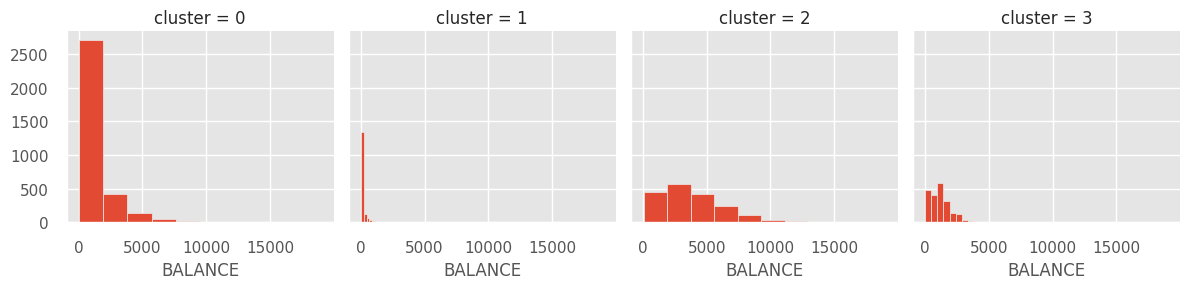

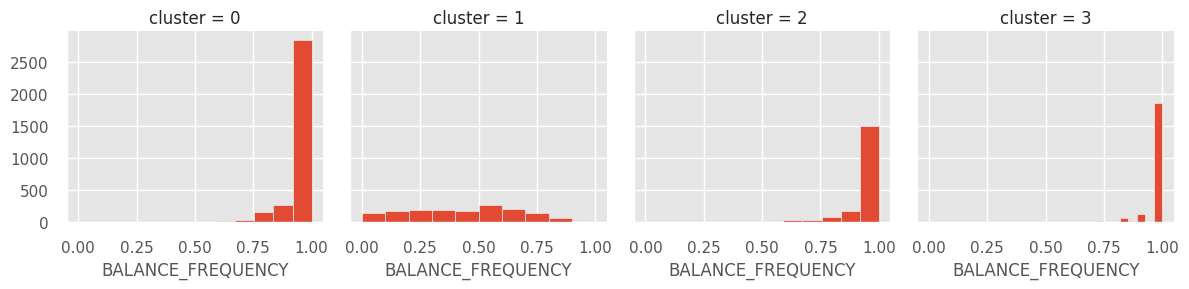

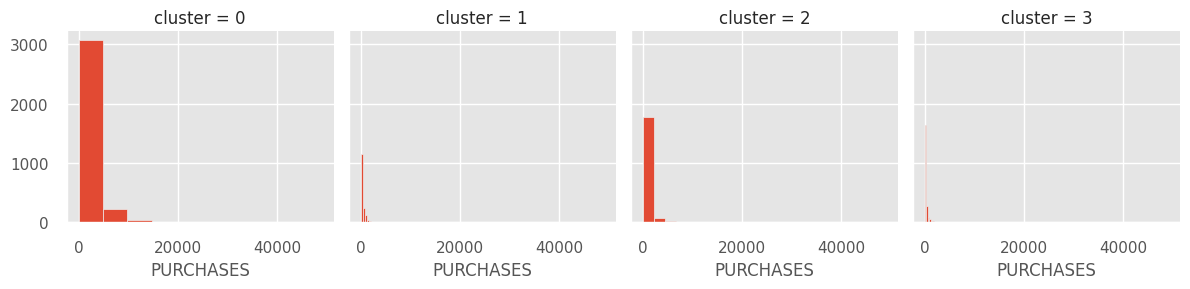

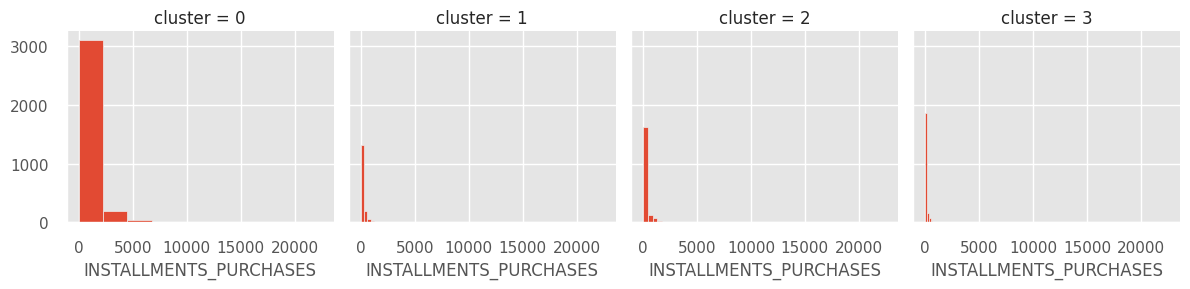

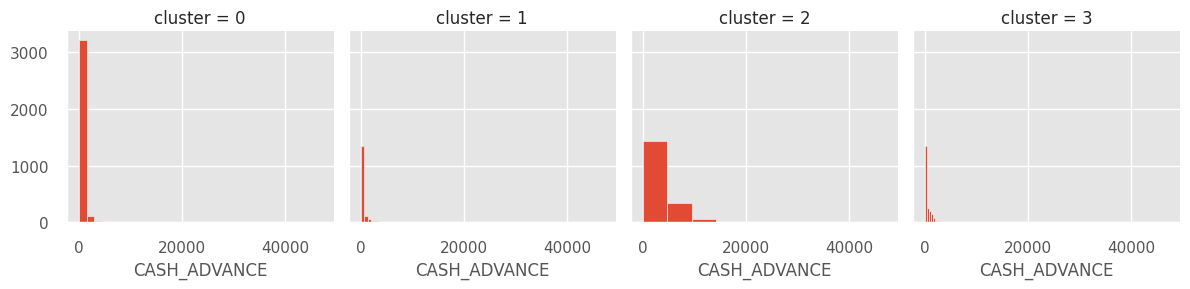

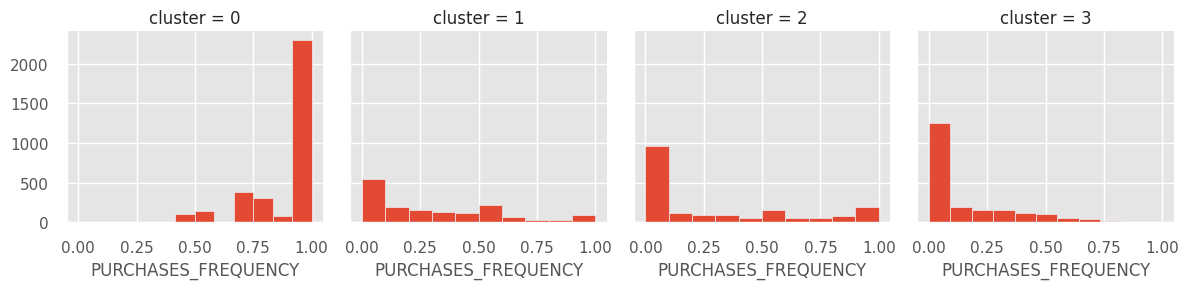

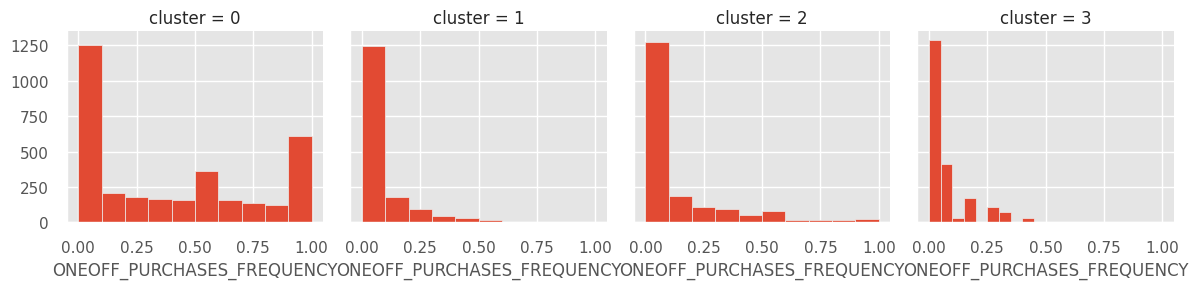

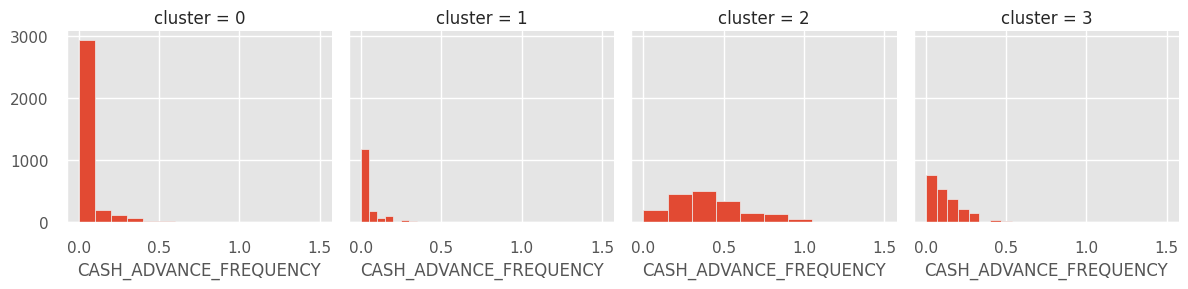

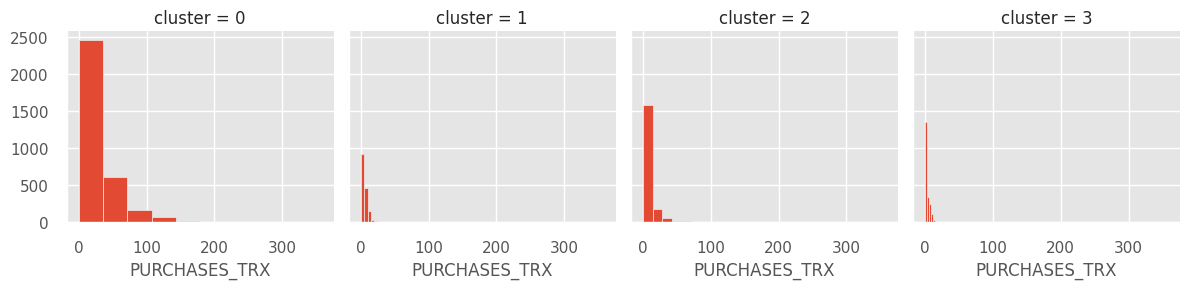

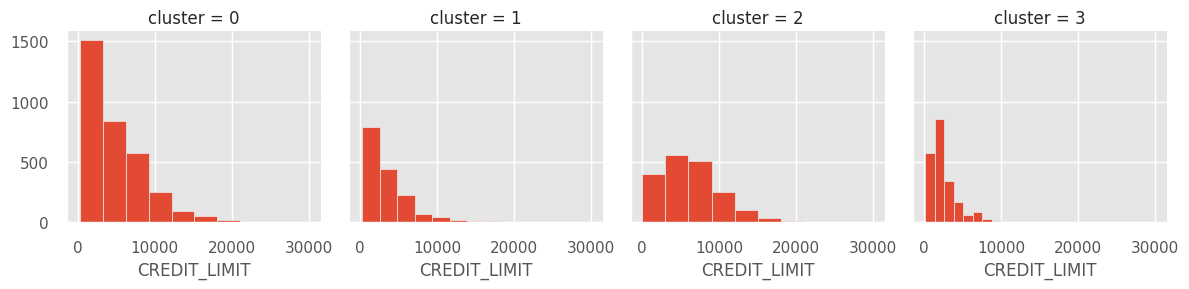

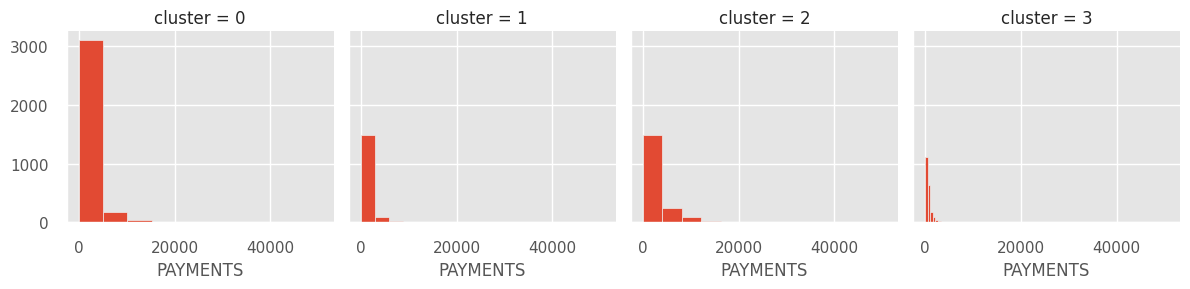

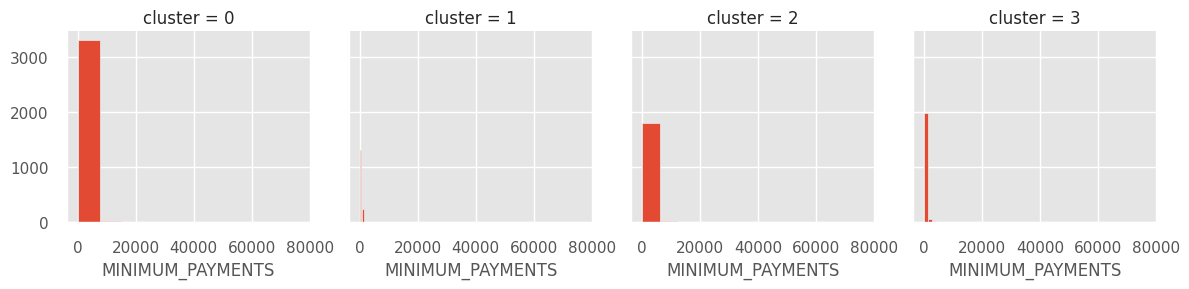

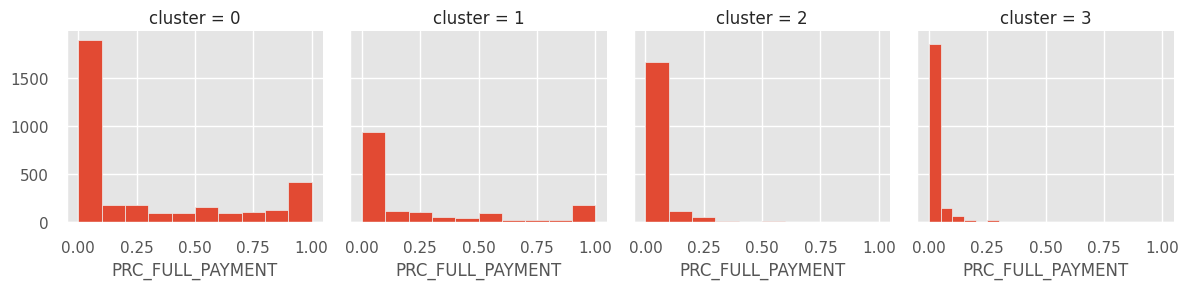

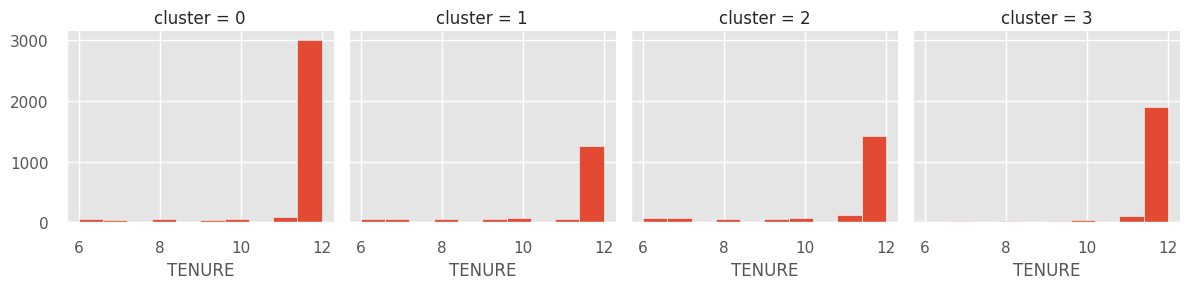

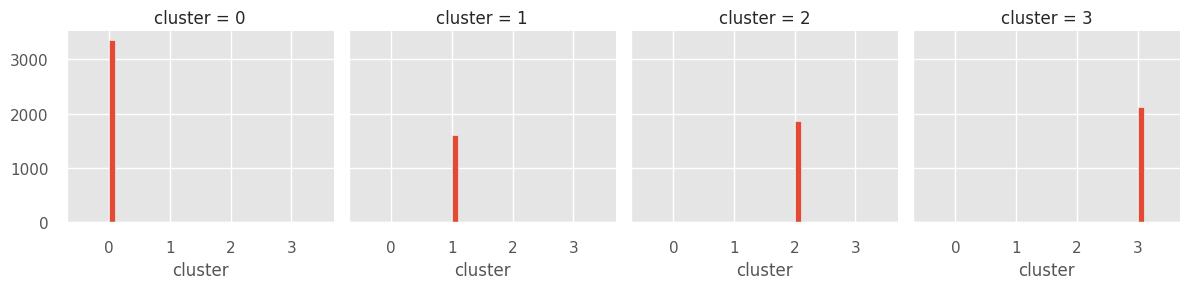

In [ ]:
# Interpretasi klaster yang terbentuk
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='cluster')
    grid.map(plt.hist, c)

- Cluster 0
  Saldo sangat kecil, purchases kecil, credit limit rata-rata (di bawah 18000), dan payments kecil (di bawah 12000).

- Cluster 1
  Saldo paling banyak (di atas 15000), purchases tinggi (di bawah 150000), credit limit paling banyak (di atas 20000), dan payments paling tinggi (di atas 20000).

- Cluster 2
  Saldo medium (di atas 5000 dan di bawah 12000), purchases rata-rata (di bawah 15000 dan di antara 20000-30000), credit limit tinggi (20000), dan payments rata-rata (di bawah 23000).

- Cluster 3
  Saldo kecil (di bawah 4900), purchases sangat kecil di antara cluster lainnya, credit limit kecil (di bawah 10000), payments sangat sedikit.

## Kesimpulan

1. Project ini mengaplikasikan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang digunakan adalah K-Means Clustering dan K-Medoids yang menghasilkan nilai evaluasi silhouette paling baik adalah K-Means Clustering.
2. Dataset yang digunakan dalam analisis cluster ini adalah data transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dengan menggunakan 14 atribut.
3. Dari analisis yang telah dilakukan menghasilkan 4 cluster, yaitu sebagai berikut:
  
  - Cluster 0, saldo sangat kecil, purchases kecil, credit limit rata-rata (di bawah 18000), dan payments kecil (di bawah 12000).
  - Cluster 1 Saldo paling banyak (di atas 15000), purchases tinggi (di bawah 150000), credit limit paling banyak (di atas 20000), dan payments paling tinggi (di atas 20000).
  - Cluster 2 Saldo medium (di atas 5000 dan di bawah 12000), purchases rata-rata (di bawah 15000 dan di antara 20000-30000), credit limit tinggi (20000), dan payments rata-rata (di bawah 23000).
  - Cluster 3 Saldo kecil (di bawah 4900), purchases sangat kecil di antara cluster lainnya, credit limit kecil (di bawah 10000), payments sangat sedikit.